### Generating visualizations
In this notebook, we describe the generation of bar charts. These charts are used by us to compare the performance of the tree models presented in this work.

### 1. Import libraries
- We use pickle to load the models we trained and saved in .pickle format. 
- We use pandas to load the datasets which will be used for generating predictions and therefore measuring the F1-Score, our metric of choice
- We use matplotlib to draw charts.
- We use train_test_split to split the dataset.
- We use f1_score to compute the F1-Score.

In [42]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### 2. Load each model
We load each model for each dataset and store them in a dictionary.

In [43]:
base_folder = "../models"
model_names = ['DT', 'RF', 'BT']
dataset_names = ['full', 'undr']
loaded_models = {}

for model_name in model_names:
    loaded_models[model_name] = {}
    loaded_models[model_name]['full'] = pickle.load(open(base_folder + "/" + model_name + "_model.pickle", 'rb'))
    loaded_models[model_name]['undr'] = pickle.load(open(base_folder + "/" + model_name + "_undersample_model.pickle", 'rb'))

/home/ullmann/.local/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 3. Load each dataset and split them
We load and split the full and undersampled datasets. We do so to obtain the test set, which we will use to generate predictions. 

In [44]:
# full ds
full_ds = pd.read_csv('../preprocessing/data/london_clean.csv')
Xf = full_ds[['DateOfCall', 'PropertyType', 'NumPumpsAttending', 'PumpHoursRoundUp', 'mean_temp']]
yf = full_ds[['CostCat']]
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.33, random_state=42)

# undersampled ds
undr_ds = pd.read_csv('../preprocessing/data/london_clean_undersample.csv')
Xu = undr_ds[['DateOfCall', 'PropertyType', 'NumPumpsAttending', 'PumpHoursRoundUp', 'mean_temp']]
yu = undr_ds[['CostCat']]
Xu_train, Xu_test, yu_train, yu_test = train_test_split(Xu, yu, test_size=0.33, random_state=42)

### 4. Compute F1-Score for each combination of model/dataset
We compute the F1-Score and store the results for each combination of model/dataset in a dictionary.

In [45]:
metric = 0
results = {}
for model_name in model_names:
    results[model_name] = {}
    for ds_name in dataset_names:
        loaded_model = loaded_models[model_name][ds_name]
        print("Computing for:", type(loaded_model), ",", ds_name, "dataset")
        if ds_name == 'full':
           pred = loaded_model.predict(Xf_test)
           metric = f1_score(yf_test, pred, average='weighted')
        else:
           pred = loaded_model.predict(Xu_test)
           metric = f1_score(yu_test, pred, average='weighted')
        results[model_name][ds_name] = round(metric, 3)
results

Computing for: <class 'sklearn.tree._classes.DecisionTreeClassifier'> , full dataset
Computing for: <class 'sklearn.tree._classes.DecisionTreeClassifier'> , undr dataset
Computing for: <class 'sklearn.model_selection._search.GridSearchCV'> , full dataset
Computing for: <class 'sklearn.model_selection._search.GridSearchCV'> , undr dataset
Computing for: <class 'xgboost.sklearn.XGBClassifier'> , full dataset
Computing for: <class 'xgboost.sklearn.XGBClassifier'> , undr dataset


{'DT': {'full': 0.778, 'undr': 0.789},
 'RF': {'full': 0.608, 'undr': 0.685},
 'BT': {'full': 0.757, 'undr': 0.778}}

### 5. Draw Charts and Compare

### 5.1 F1-Score Comparison (Full Dataset)
Using the full dataset, the best performing model is the Decision Tree (DT), with f1_score = 0.778, followed very closely by Boosted Trees (BT), with f1_score = 0.757. The Random Forest performed a bit worse, with f1_score = 0.608. 

This came as a surprise to us because both Random Forest and Boosted Trees work with a combination of several Decision Trees and therefore should reach a better result than a single tree. While we could not identify the exact cause of the poor performance of the Random Forest, we observed the tree models has similar F1-Score and therefore would be equally good for providing firefighting cost predictions.

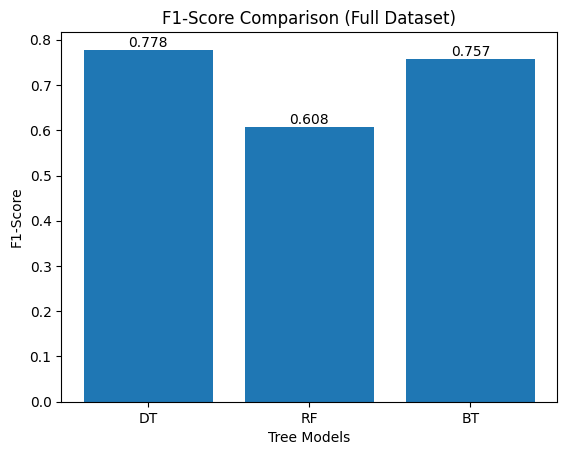

In [47]:
x_axis = model_names
y_axis = []

for model_name in model_names:
    y_axis.append(results[model_name]['full'])

plt.bar(x_axis, y_axis)
plt.xlabel('Tree Models')
plt.ylabel('F1-Score')
plt.title("F1-Score Comparison (Full Dataset)")
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], str(y_axis[i]), ha='center', va='bottom')

### 5.2 F1-Score Comparison (Undersampled Dataset)

Using the undersampled dataset, the best performing model is the Decision Tree (DT), with f1_score = 0.789, followed very closely by Boosted Trees (BT), with f1_score = 0.778. The Random Forest performed a bit worse, with f1_score = 0.685. 

The three models performed slightly better with the undersampled dataset in comparison with the full dataset.  which shows that the imbalance of the London Fire Dept dataset had an impact on the performance from the beginning and working to decrease this imbalance was a good choice.

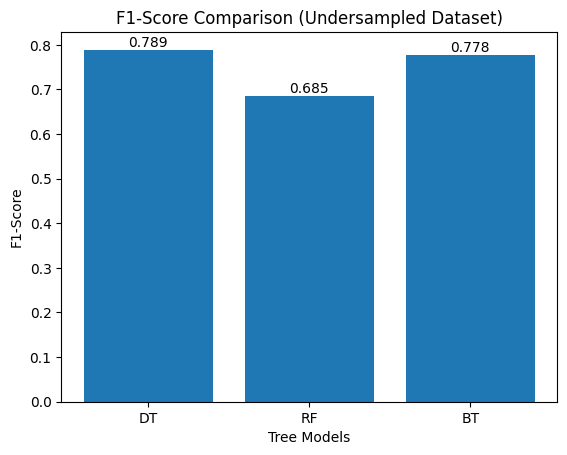

In [56]:
x_axis = model_names
y_axis = []

for model_name in model_names:
    y_axis.append(results[model_name]['undr'])

plt.bar(x_axis, y_axis)
plt.xlabel('Tree Models')
plt.ylabel('F1-Score')
plt.title("F1-Score Comparison (Undersampled Dataset)")
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], str(y_axis[i]), ha='center', va='bottom')

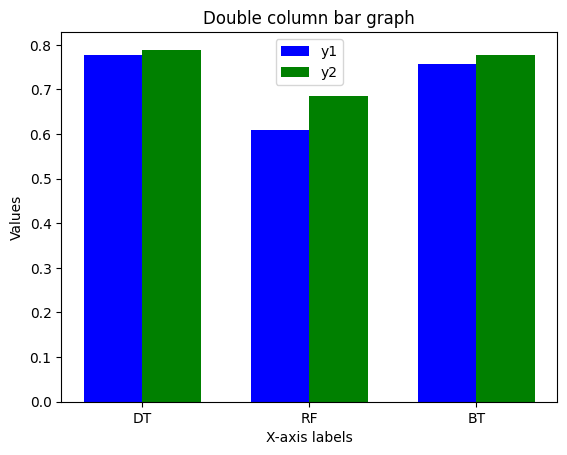

In [71]:
# Data
x = model_names
y1 = y1_axis
y2 = y2_axis

# Figure and axes setup
fig, ax = plt.subplots()

# Set bar width
bar_width = 0.35

# Set positions of the left bar-boundaries
bar1_positions = range(len(x))
bar2_positions = [x + bar_width for x in bar1_positions]

# Plot the bars
ax.bar(bar1_positions, y1, width=bar_width, color='b', label='y1')
ax.bar(bar2_positions, y2, width=bar_width, color='g', label='y2')

# Add labels, title, and legend
ax.set_xlabel('X-axis labels')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score by Dataset')
ax.set_xticks([r + bar_width / 2 for r in bar1_positions])
ax.set_xticklabels(x)
ax.legend()



### 6. Conclusion
To answer our initial research questions:

#### 1. Is it possible to predict the notional cost of firefighting operations using tree-based models?
**Answer:** Yes, we were able to predict the firefighting cost using decision tree, random forest and boosted tree models with similar prediction accuracy (F1-Score).

#### 2. Which tree-based model provides the best prediction accuracy?
**Answer:** Decision Tree models are the most accurate for predicting firefighting cost, attaining a F1-Score of 0.789 in our best test scenario (undersampled dataset).

#### 3. What features correlate more or less strongly with the notional cost?
**Answer:** As seen in the notebook preprocessing/2_check_correlation.ipynb there is a strong correlation between the cost and: 
- The number of pumps.
- The number of working hours.